In [49]:
import sys
sys.path.append("../files/")
#from nn_utils import ts_supervised

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn, seed
from scipy.optimize import minimize
#------------------------------------
import seaborn as sns

In [4]:
%config InlineBackend.figure_format = "retina"

In [5]:
#port_path = path del archivo...
#o si esta en la misma carpeta:
market = pd.read_excel("Prueba.xlsx", index_col=0)
market.columns = [c.replace(" MF Equity", "").replace(" INDEX", "") for c in market.columns]

In [6]:
market

,KIMBERA,GAPB,CEMEXCPO,ASURB,GFNORTEO,KOFUBL,AC*,LABB,FEMSAUBD,OMAB,...,MEGACPO,GCC*,BIMBOA,GMEXICOB,GCARSOA1,TLEVICPO,ALFAA,BSMXB,PINFRA*,MEXBOL
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,38.50,225.87,7.16,354.06,105.00,114.88,102.63,18.58,179.27,141.14,...,77.22,101.53,34.88,51.89,69.80,44.23,16.00,25.72,193.51,43657.48
2019-12-31,37.50,224.67,7.08,354.04,105.65,114.88,99.98,18.71,178.67,141.83,...,77.44,100.86,34.43,51.86,69.82,44.37,15.68,25.83,193.54,43541.02
2020-01-01,37.50,224.67,7.08,354.04,105.65,114.88,99.98,18.71,178.67,141.83,...,77.44,100.86,34.43,51.86,69.82,44.37,15.68,25.83,193.54,43541.02


In [7]:
market.dtypes

KIMBERA     float64
GAPB        float64
CEMEXCPO    float64
ASURB       float64
GFNORTEO    float64
KOFUBL      float64
AC*         float64
LABB        float64
FEMSAUBD    float64
OMAB        float64
GFINBURO    float64
AMXL        float64
ALSEA*      float64
ORBIA*      float64
PE&OLES*    float64
GRUMAB      float64
RA          float64
WALMEX*     float64
BOLSAA      float64
LIVEPOLC    float64
GENTERA*    float64
IENOVA*     float64
CUERVO*     float64
ELEKTRA*    float64
BBAJIOO     float64
ALPEKA      float64
MEGACPO     float64
GCC*        float64
BIMBOA      float64
GMEXICOB    float64
GCARSOA1    float64
TLEVICPO    float64
ALFAA       float64
BSMXB       float64
PINFRA*     float64
MEXBOL      float64
dtype: object

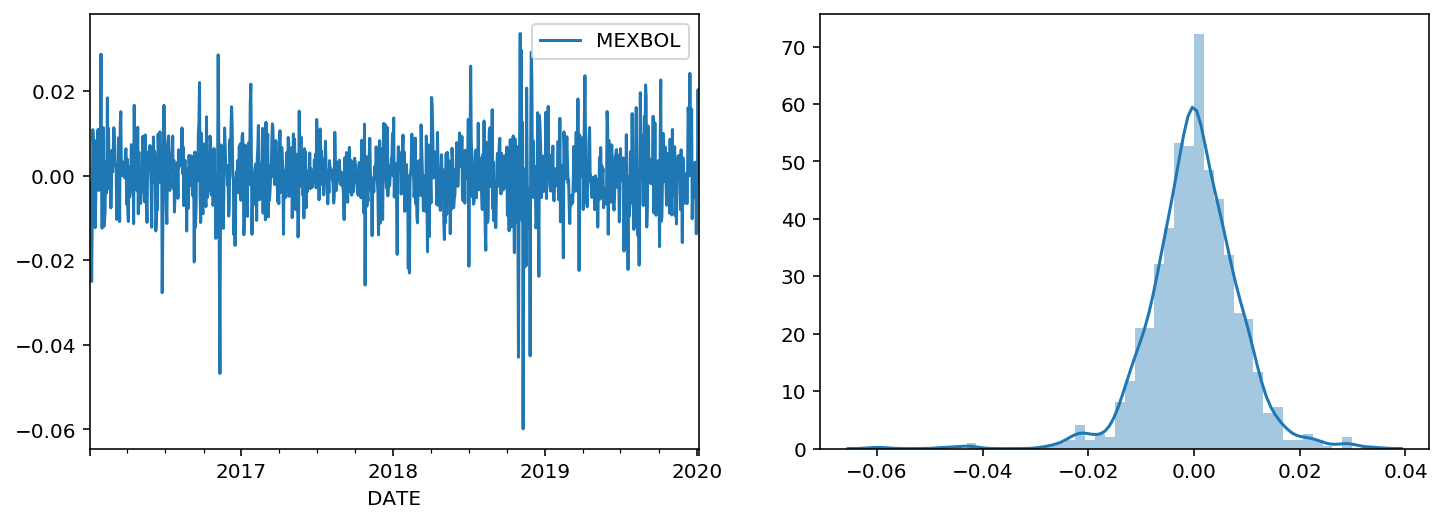

In [8]:
R=market[["MEXBOL"]]
R= np.log(R).diff().dropna()  #R es la serie de rendimientos diarios
fig, ax =plt.subplots(1,2, figsize=(12,4))
R.plot(ax=ax[0])
#fig, ax = plt.subplots(1,2)
sns.distplot(R, ax=ax[1]) #grafico su histograma con curva

In [9]:
R #R es la serie de rendimientos diarios

,MEXBOL
DATE,
2016-01-04,-0.020304
2016-01-05,-0.001712
2016-01-06,-0.008372
2016-01-07,-0.025006
2016-01-08,-0.009792
...,...
2019-12-30,-0.013741
2019-12-31,-0.002671
2020-01-01,0.000000


In [10]:
test_year = "2019"
R_train = R[:test_year]  #todo los que estan antes de test year
R_test = R[test_year:]  #todo lo que esta despues de test year

In [11]:
class GARCHSigmas:
    """
    Clase para estimar sigmas para un GARCH(1,1)
    """
    def __init__(self, lamb, sigma_init, R):
        self.lamb = lamb
        self.R = R
        self.sigma_hist = [sigma_init]  #sigma_init es la primera sigma que va a ser la historica (ES UNA LISTA)
        self.initialize_sigmas()
        
    def get_sigma1(self,t): #genero un historico de las sigmast que voy calculando, hasta el tiempo t
        """"
        Calcula sigma_t dado datos en t-1
        """
        rt0 = 0 if t==0 else self.R.iloc[t-1,0] #sigma t depende de sigma t-1
        sigma0 = self.sigma_hist[-1]  #sigma0 es la sigma t-1 de la cual tambien depende sigma t
        sigma1 = (1-self.lamb)*rt0**2+(self.lamb*sigma0) # sigma1 es sigmat, la que busco en cada punto de tiempo t
        self.sigma_hist.append(sigma1) #genero un historico de las sigmast que voy calculando, hasta el tiempo t
        
    def initialize_sigmas(self):
        N, M = self.R.shape
        for t in range(N-1,-1,-1):
            self.get_sigma1(t) #genero un historico de las sigmast, hasta el tiempo t, para cada Rt (elemento de R)

In [12]:
R.values.shape

(1045, 1)

In [13]:
R.values.ravel().shape #te convierte un array de nxm en uno de 1 x (mxn), es decir mxn columnas

(1045,)

In [14]:
def LGarch(lamb, sigma_init,R): #L de logverosimilutud, es la funcion para obtener la logverosimilitud de funcion Garch
    s=GARCHSigmas(lamb, sigma_init, R) #me devuelve un historico de las sigmast, hasta el tiempo t (ES UNA LISTA)
    sigma_hist = np.array(s.sigma_hist[1:]) #me genera un array con historico de las simgat que voy calculando (ES UNA ARRAY)
    r1_2=R.values.ravel()**2  #elevame los rendimientos diarios al cuadrado de pd.array donde estan
    log_likelihood = (np.log(sigma_hist)+r1_2/sigma_hist).sum()/2  #esta es la funcion de logverosimilitud de la funcion Garch
    return log_likelihood #regresame la funcion de logverosimilitud de la funcion Garch

In [15]:
R.var(ddof=1) #con var saco la varianza, al poner ddof = 1 me da la varainza, si no lo pusierada lo mismo

MEXBOL    0.000071
dtype: float64

In [16]:
R.var(ddof=1).item()  #con item obtengo elos valores de un diccionario

C:\Users\jhony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


7.108304072556268e-05

In [19]:
seed(314)
lamb=np.abs(randn(1)) #lamb la genero como numero aleatorio menor a 1 y mayor a cero
sigma_init=R.var(ddof=1).item()/252 #la sigma inicial es la historica que obtengo de R, la convierto a diaria
LGarch(lamb, sigma_init,R) #regresame la funcion de logverosimilitud de la funcion Garch evaluada en el parametro

C:\Users\jhony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `item` has been deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


-551705.0600243221

In [24]:
#Configuracion de modelo
x0 = np.array([lamb])  #x0 es mi vector de parametros
L_part = lambda x0: LGarch(*x0, sigma_init, R)

def cons(x):
    return x[0]  
    
# restriccion de no negativos
bounds = [
    (0, None)   #lamb no puede ser negativo
]

In [21]:
bounds

[(0, None)]

In [22]:
x0

array([[0.16608544]])

In [25]:
#minimizar el negativo o maximizar el positivo
fmin=minimize(L_part,x0,  #quiero el valor de x0 (gama, alfa y beta) que optimizan la logversimilitud de garch
              constraints = {"type": "ineq", "fun":cons},  #le meto la funcion de restricciones
             bounds=bounds) #le meto los limites

C:\Users\jhony\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
C:\Users\jhony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [26]:
fmin

     fun: -4355.826078781336
     jac: array([-0.12042236])
 message: 'Optimization terminated successfully.'
    nfev: 37
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.90886261])

In [42]:
lamb_garch = fmin.x[0] #estos son los parametros omega, alpha y beta que optimizan la logversimilitud de garch

In [43]:
#Volatilidades sigma2
sigma0 = sigma_init #la sigma inicial (la primera sigma0) es la historica que obtengo de R
garch_predict = []
for i in range(len(R)): #para todos los puntos en el tiempo donde hay un rendimiento diario, range inicia en cero y termina en R-1
    sigma0 = (1-lamb_garch)*R.iloc[i].item()**2+lamb_garch*sigma0  #pongo sigma0 al inicio para que sea recursiva
    garch_predict.append(sigma0) #obtengo la sigma para cada punto en el tiempo t ya con los parametros otpimizados

C:\Users\jhony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  """


In [44]:
garch_predict

[3.782656775682477e-05,
 3.464614582021216e-05,
 3.787594002060416e-05,
 9.141412950304253e-05,
 9.182076725433529e-05,
 9.429156719131149e-05,
 9.114265013023233e-05,
 8.284670476659072e-05,
 8.165476173403257e-05,
 8.79751597961866e-05,
 8.319954402542451e-05,
 7.791615360388514e-05,
 7.088267216143272e-05,
 7.005888842219772e-05,
 7.465795439340422e-05,
 6.896319299742061e-05,
 7.357609711260398e-05,
 6.849670756486994e-05,
 6.63465926085861e-05,
 0.00013578225666912046,
 0.0001234074165905107,
 0.00012620510486195224,
 0.0001160349770696941,
 0.00011722973749312832,
 0.00011968846040413075,
 0.00011897569519764189,
 0.00011522405309891324,
 0.0001056650881177542,
 9.761042537488929e-05,
 8.888031120014676e-05,
 0.00011177402948763044,
 0.00010213289168466455,
 0.0001042323721242407,
 9.495883399450186e-05,
 8.726922819159e-05,
 8.073339286879178e-05,
 7.865375126515188e-05,
 7.157514063119445e-05,
 6.835811621593672e-05,
 6.220087204736353e-05,
 5.9330335089733037e-05,
 6.569078292

In [45]:
len(garch_predict) #para cada uno de las 1045 observaciones de R (dias)

1045

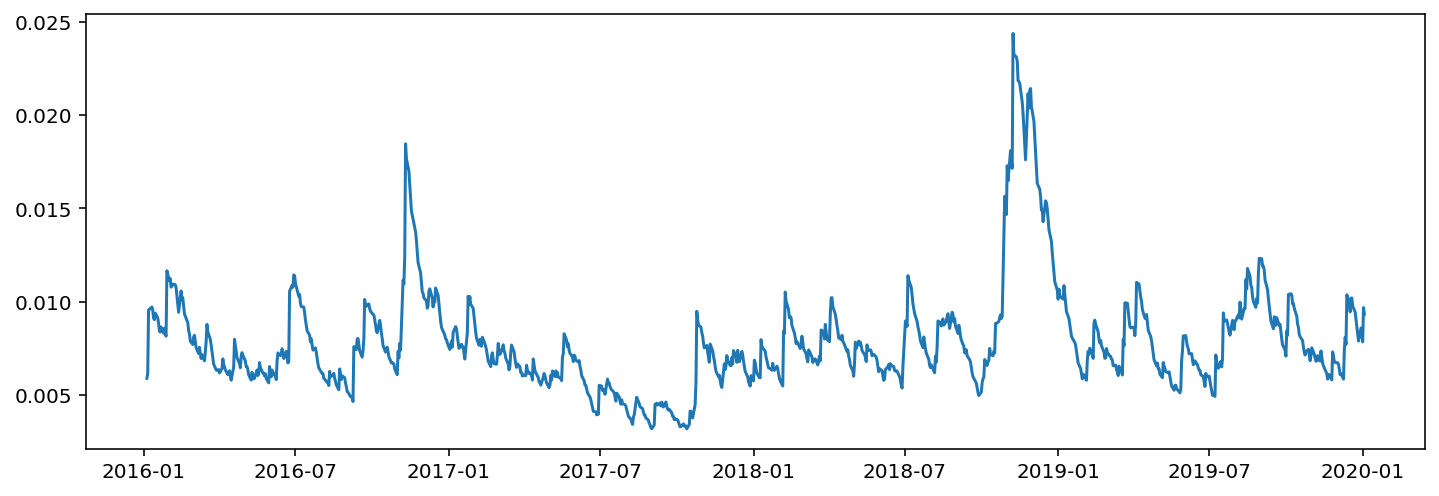

In [46]:
xaxis = R.index[1:]
sigma_garch = np.sqrt(garch_predict)[1:]

plt.subplots(figsize=(12,4))
plt.plot(xaxis, sigma_garch)

In [47]:
%matplotlib inline

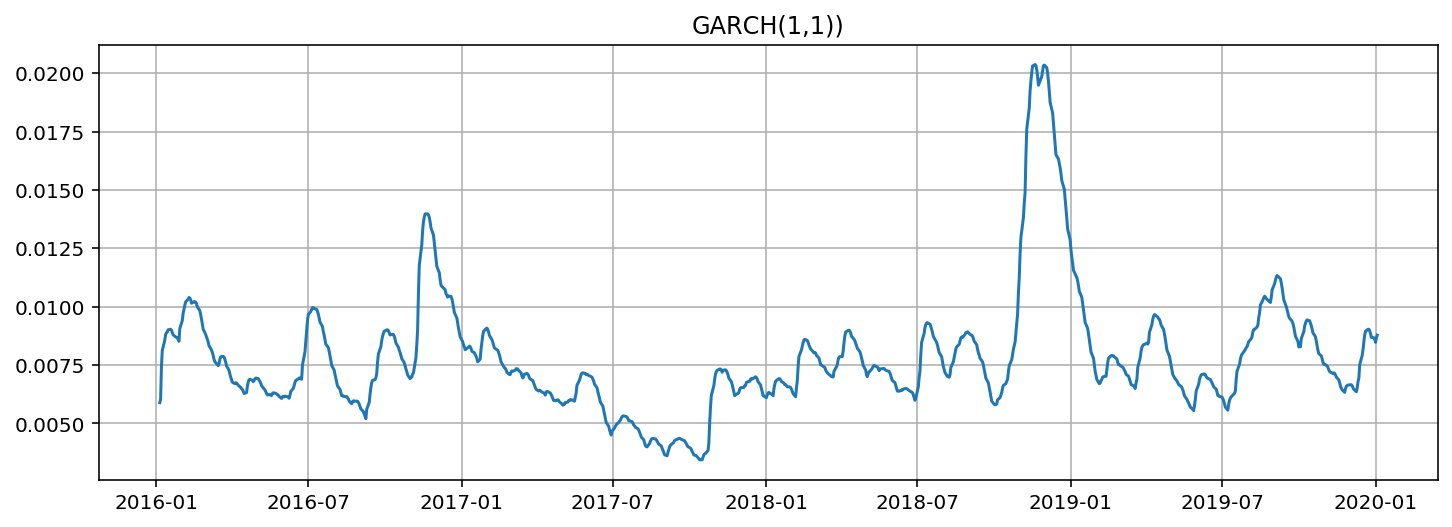

In [48]:
xaxis = R.index[1:]
sigma_garch = pd.Series(np.sqrt(garch_predict)[1:])

plt.subplots(figsize=(12,4))
plt.title("GARCH(1,1))")
plt.grid()
plt.plot(xaxis, sigma_garch.ewm(5).mean());